<a href="https://colab.research.google.com/github/YinkaO-web/Codeworks-2024-Projects/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

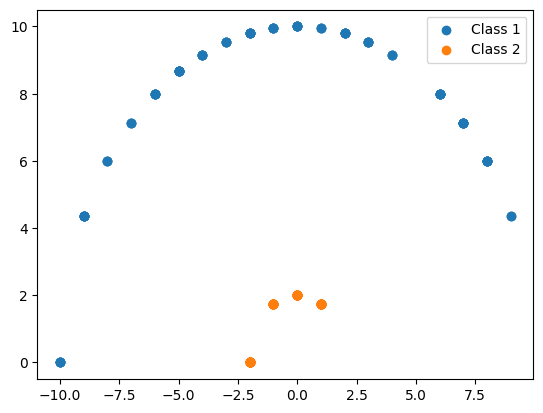

In [ ]:
x = np.random.randint(-10, 10, 100)
y = [(100 - i**2)**0.5 for i in x]
x1 = np.random.randint(-2, 2, 100)
y1 = [(4 - i**2)**0.5 for i in x1]
plt.scatter(x, y, label = 'Class 1')
plt.scatter(x1, y1, label = 'Class 2')
plt.legend()
plt.show()

In [ ]:
xs = np.concatenate([x, x1])
ys = np.concatenate([y, y1])
labels = np.concatenate([np.tile([1], 100), np.tile([0], 100)])
df = pd.DataFrame({'x': xs, 'y': ys, 'label': labels})
df

,x,y,label
0,-5,8.660254,1
1,-3,9.539392,1
2,0,10.000000,1
3,8,6.000000,1
4,-9,4.358899,1
...,...,...,...
195,-2,0.000000,0
196,0,2.000000,0
197,-2,0.000000,0
198,-1,1.732051,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ['x', 'y']], df.loc[:, ['label']], shuffle = True, test_size = 0.2)

In [ ]:
params = {'kernel': ['rbf', 'polynomial'], 'C': [0.01, 0.1, 1], 'degree': [2, 3]}
svc = SVC()
grid_search = GridSearchCV(svc, params)

In [ ]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3],
                         'kernel': ['rbf', 'polynomial']})

In [ ]:
grid_search.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}

In [ ]:
svc = SVC(kernel = 'rbf', C = 0.1)
svc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1)

In [ ]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[84,  0],
       [ 0, 76]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[16,  0],
       [ 0, 24]])